In [11]:
import apgpy as apg
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
n = 300
m = 1000
A = np.random.randn(m, n)
b = np.random.randn(m)
np.linalg.cond(A)

3.3497471942257939

In [3]:
U, s, V = np.linalg.svd(A, full_matrices=True)
S = np.zeros((m, n))
S[:n, :n] = np.diag(s)
S = S**2

A = np.dot(U, np.dot(S, V))
np.linalg.cond(A)


11.220806265223541

In [4]:
AtA = np.dot(A.T, A)
Atb = np.dot(A.T, b)

In [5]:
eps = 1e-10

In [6]:
def quad_grad(y):
    return np.dot(AtA, y) - Atb

iter num 0, norm(Gk)/(1+norm(xk)): nan, step-size: 2.81e-07
iter num 100, norm(Gk)/(1+norm(xk)): 2.33e-01, step-size: 2.18e-07
iter num 200, norm(Gk)/(1+norm(xk)): 1.68e-04, step-size: 1.79e-07
iter num 300, norm(Gk)/(1+norm(xk)): 5.32e-08, step-size: 1.38e-07
iter num 376, norm(Gk)/(1+norm(xk)): 9.87e-11, step-size: 2.95e-07
terminated


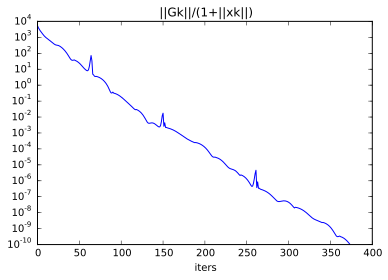

In [12]:
x = apg.solve(quad_grad, {}, n, eps = eps)

In [ ]:
x_no_restart = apg.solve(quad_grad, {}, n, eps = eps, use_restart=False, max_iters=10000)

In [ ]:
def cg(A, b, x=False, eps=1e-12, gen_plots=True):
    n = np.shape(A)[0]
    if not x:
        x = np.zeros(n)
    r = b - np.dot(A, x)
    p = np.copy(r)
    rsold = np.linalg.norm(r)**2

    max_iters = 10 * n # cg should only need n steps
    if gen_plots:
        errs = np.zeros(max_iters)
        import matplotlib.pyplot as plt

    k = 0
    for k in range(max_iters):
        Ap = np.dot(A, p)
        alpha = rsold / np.inner(p, Ap)
        x = x + alpha * p
        r = r - alpha * Ap
        rsnew = np.linalg.norm(r)**2
        err = rsnew**0.5 / (1 + np.linalg.norm(x))
        if gen_plots:
            errs[k] = err

        if err < eps:
              break
        p = r + p * (rsnew / rsold)
        rsold=rsnew
        
    if gen_plots:
        errs = errs[1:k]
        plt.semilogy(errs[1:k])
        plt.xlabel('iters')
        plt.title('||rk|| / (1 + ||xk||')

    return x

In [ ]:
x_cg = cg(AtA, Atb, eps = eps)

In [ ]:
np.linalg.norm(x - x_cg) / np.linalg.norm(x_cg)

In [ ]:
np.linalg.norm(np.dot(A,x) - b)

In [ ]:
np.linalg.norm(np.dot(A,x_cg) - b)

In [ ]:
plt.plot(x)
plt.plot(x_cg)